In [77]:
import numpy as np
from math import pi
from numpy import cos, sin, rad2deg
from skimage import io
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v, threshold_mean,threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola, threshold_triangle, threshold_yen, gaussian, apply_hysteresis_threshold
from skimage.feature import canny,corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
# from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis
from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim,Circle
import sys
import time
sys.setrecursionlimit(1500)




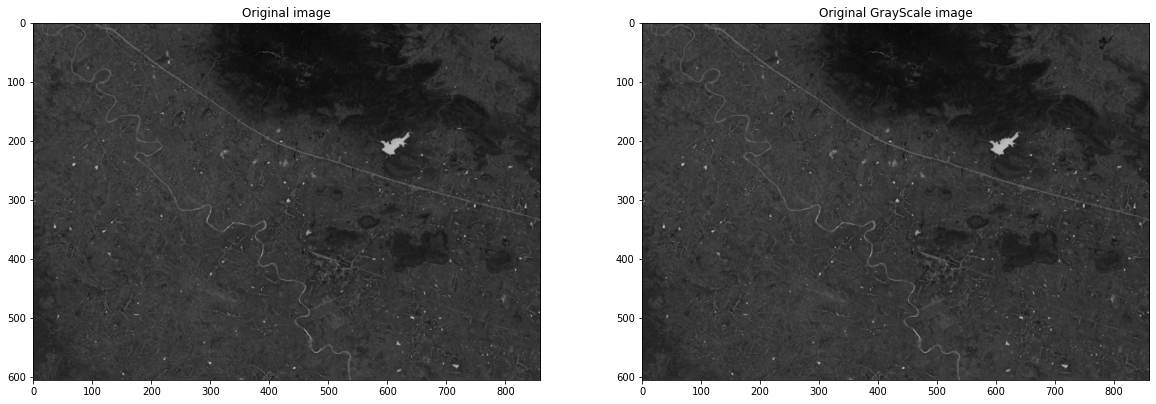

(605, 860)


In [78]:
_img = io.imread('final.png')
# _img=io.imread("raa.png")
# use the below line if internet is not available and comment the above line

# _img = imread('riv1.png') 
# _img=io.imread("im.png")

figure(figsize=(20,17))

subplot(1,2,1)
title("Original image")
imshow(_img, cmap="gray")
img = _img
if(len(_img.shape) == 3):
    img = rgb2gray(_img)
    img = img*255

subplot(1,2,2)
title("Original GrayScale image")
imshow(img, cmap="gray")

show()
print(img.shape)

In [79]:
gfilter = [ [1,6,15,20,15,6,1], 
            [6,36,90,120,90,36,6],
            [15,90,225,300,225,90,15], 
            [20,120,300,400,300,120,20], 
            [15,90,225,300,225,90,15], 
            [6,36,90,120,90,36,6], 
            [1,6,15,20,15,6,1]
        ]
gfilter = np.array(gfilter)
gfilter = gfilter/sum(sum(gfilter))
def gmasking(img):
    img = np.pad(img, (3,3), 'constant', constant_values=(0,0))
    img = img.astype(float)
    img2 = np.zeros(img.shape)
    for i in range(3, img.shape[0]-3):
        for j in range(3, img.shape[1]-3):
            img2[i,j] = sum(sum(img[i-3:i+4, j-3:j+4]*gfilter))
    img2 = img2[3:-3, 3:-3]
    return img2
gimg = gmasking(img)


In [80]:
med = np.median(gimg)
med = int(med)

print(med)

for i in range(gimg.shape[0]):
    for j in range(gimg.shape[1]):
        if(gimg[i,j] > 100):
            gimg[i,j] = med
        elif(gimg[i,j] < 50):
            gimg[i,j] = med


54


0.06459936150366904


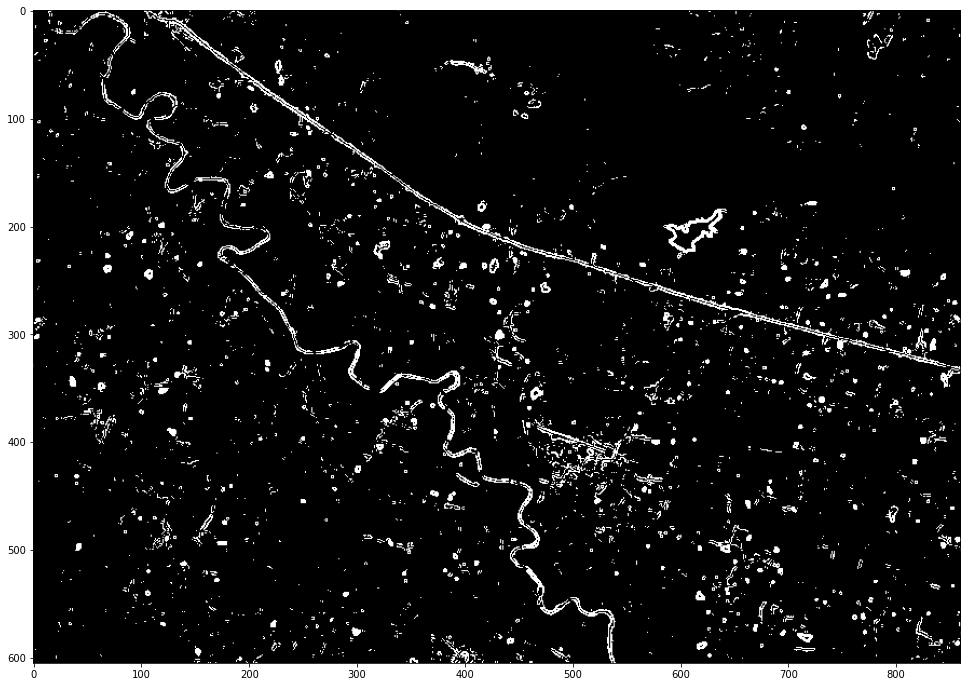

In [87]:
# image smoothing 9*9 
# sobel, sobel_h, sobel_v, threshold_mean,threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola, threshold_triangle, threshold_yen, gaussian, apply_hysteresis_threshold

g = img
g = sobel(g)
print(threshold_otsu(g))
g = g>threshold_otsu(g)
figure(figsize=(17,12))
imshow(g, cmap="gray")

In [82]:
def binImg(img, x, y):
    img2 = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > x and img[i,j] < y:
                img2[i,j] = 255
            else:
                img2[i,j] = 0
    return img2

# masking 3*3
def masking(_img, kernel):
    # wraping the image
    m, n = _img.shape
    img = np.zeros((m + 2, n + 2))
    img[1:m + 1, 1:n + 1] = _img

    m,n = img.shape
    
    img2 = img.copy()
    
    for i in range(m - 2):
        for j in range(n - 2):
            img2[i + 1, j + 1] = np.sum(img[i:i + 3, j:j + 3] * kernel)
    # # img2 = img2.astype(np.uint8)
    
    # # imshow(img2, cmap = 'gray')
    # img2[0, :] = 0
    # img2[m - 1, :] = 0
    # img2[:, 0] = 0
    # img2[:, n - 1] = 0
    return img2[1:m - 1, 1:n - 1]
# masks
avg = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]]) / 10
laplacian = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitty = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

def sobel_edge(img):
    return np.sqrt(masking(img, sobelx)**2 + masking(img, sobely)**2)
mImg = masking(img, avg)
mImg = masking(mImg, avg)

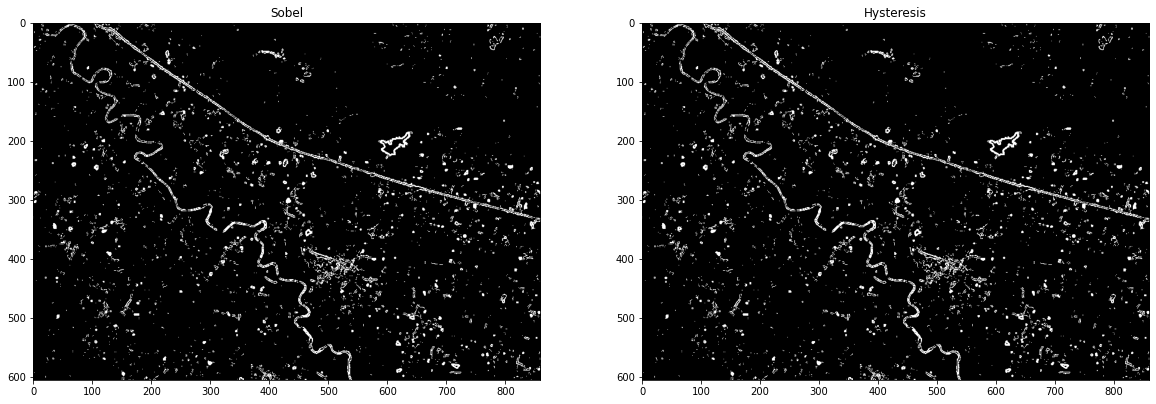

In [83]:
# temp = sobel(canny(img))
temp = g

# temp = sobel(img)
# temp = img
# temp = temp > threshold_otsu(temp)
# temp = temp > 0.1


figure(figsize=(20,17))
subplot(1,2,1)
title("Sobel")
imshow(temp, cmap="gray")
# temp = apply_hysteresis_threshold(img, .1, 0.35).astype(np.uint8)
# temp = temp > threshold_otsu(temp)
# temp = sobel(canny(mImg))
# temp = img & temp
# temp = temp > threshold_otsu(temp)
subplot(1,2,2)
title("Hysteresis")
imshow(temp, cmap="gray")
show()


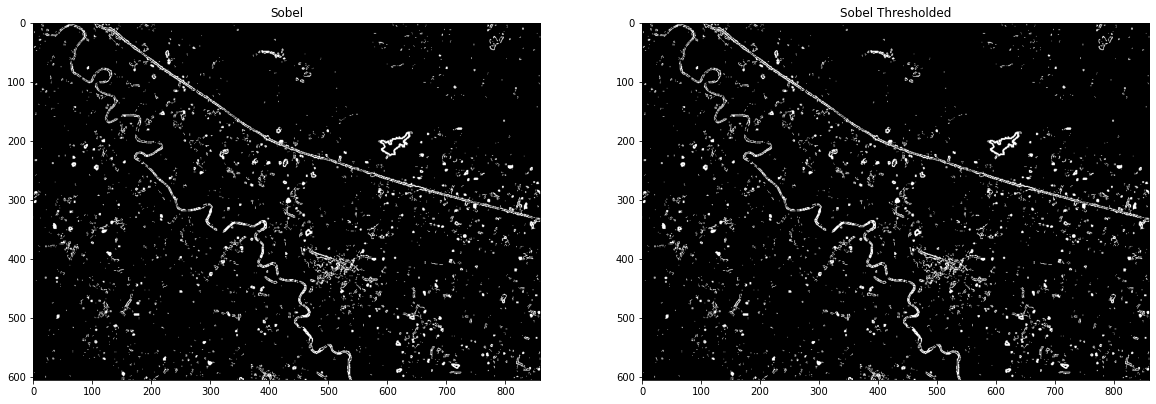

In [84]:
# temp = sobel(img)
# temp = (sobel(canny(img, sigma=1, low_threshold=20, high_threshold=30)))


figure(figsize=(20,17))
subplot(1,2,1)
title("Sobel")
imshow(temp, cmap="gray")

# temp = (sobel(canny(img, sigma=1, low_threshold=10, high_threshold=15)))
# temp = sobel(canny(img))

# temp = 
subplot(1,2,2)
title("Sobel Thresholded")
imshow(temp, cmap="gray")
show()

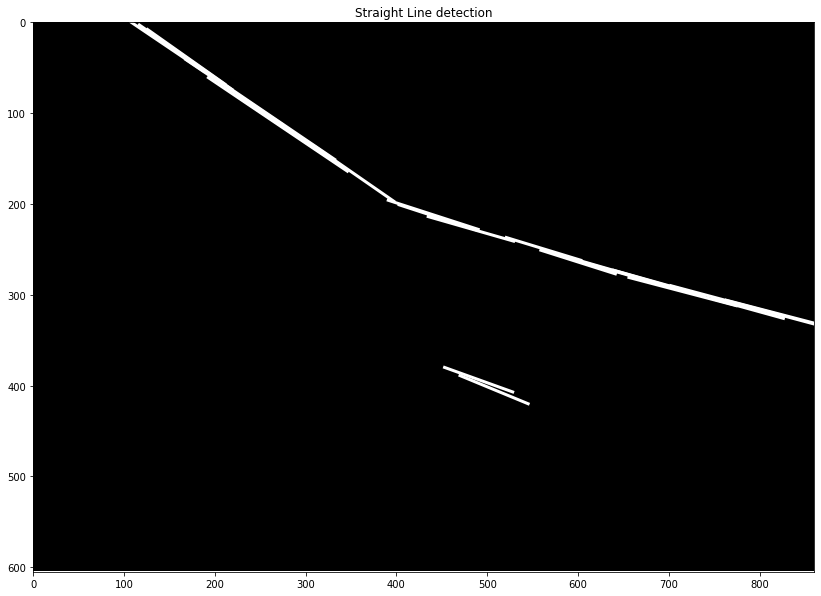

In [85]:
# temp = (canny(img))
# temp = _imgSobel.cimshowy()/255

N, M = temp.shape

lines1 = probabilistic_hough_line(
    temp, threshold=88, line_length=15, line_gap=2)
yt = np.zeros((N,M))
figure(figsize=(14, 11))
imshow(yt, cmap="gray")

# for line in lines1:
#     p0, p1 = line
#     plot((p0[0], p1[0]), (p0[1], p1[1]), color='b', linewidth=1)


lines = probabilistic_hough_line(
    temp, threshold=100, line_length=75, line_gap = 5)

for line in lines:
    p0, p1 = line
    plot((p0[0], p1[0]), (p0[1], p1[1]), color='w', linewidth=3)

axis((0, M, N, 0))
title("Straight Line detection")
show()


In [88]:

def MfloodFill(image, sr: int, sc: int):
    mxx =0;
    color = True
    newColor = False
    if color == newColor:
        return image

    stack = [(sr, sc)]
    while stack:
        mxx = max(len(stack), mxx)
        x, y = stack.pop()
        if image[x][y] != color:
            continue

        image[x][y] = newColor

        if x > 0:
            stack.append((x-1, y))
        if y > 0:
            stack.append((x, y-1))
        if x < len(image)-1:
            stack.append((x+1, y))
        if y < len(image[0])-1:
            stack.append((x, y+1))
        if x > 0 and y > 0:
            stack.append((x-1, y-1))
        if x > 0 and y < len(image[0])-1:
            stack.append((x-1, y+1))
        if x < len(image)-1 and y > 0:
            stack.append((x+1, y-1))
        if x < len(image)-1 and y < len(image[0])-1:
            stack.append((x+1, y+1))

    return image,mxx


In [89]:

def floodFill(image, sr: int, sc: int):
    mxx =0;
    color = True
    newColor = False
    if color == newColor:
        return image

    stack = [(sr, sc)]
    while stack:
        # mxx = max(len(stack), mxx)
        x, y = stack.pop()
        if image[x][y] != color:
            continue

        image[x][y] = newColor

        if x > 0:
            stack.append((x-1, y))
        if y > 0:
            stack.append((x, y-1))
        if x < len(image)-1:
            stack.append((x+1, y))
        if y < len(image[0])-1:
            stack.append((x, y+1))
        if x > 0 and y > 0:
            stack.append((x-1, y-1))
        if x > 0 and y < len(image[0])-1:
            stack.append((x-1, y+1))
        if x < len(image)-1 and y > 0:
            stack.append((x+1, y-1))
        if x < len(image)-1 and y < len(image[0])-1:
            stack.append((x+1, y+1))

    return image
